##**Linear Regression:** 


Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing.

## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

source_dataset = pd.read_csv("weather_dataset.csv")

source_dataset['recording_date_time'] = source_dataset['recording_date_time'].str[:23].astype('datetime64[ns]')

training_dataset = source_dataset[source_dataset['recording_date_time'] <= '2014-12-31']
del training_dataset['recording_date_time']
test_dataset = source_dataset[source_dataset['recording_date_time'] >= '2014-12-31']
del test_dataset['recording_date_time']

2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings.

In [ ]:
temp_corr = pd.DataFrame(training_dataset.corr()['temperature'][:])
#Assumption that an insignificant feature is defined as one with less than an ABSOLUTE VALUE of correlation than 0.5
InsignificantFeatures = (temp_corr[abs(temp_corr['temperature']) < 0.5]).rename(columns={'temperature': 'feature corr'})

print("The feature displayed below are deemed insignificant in predicting temperature, as the absolute correlation between")
print("'temperature' and the given feature is less than 0.5, which indicates a low/moderate correlation")
print("----------")
print(InsignificantFeatures)


The feature displayed below are deemed insignificant in predicting temperature, as the absolute correlation between
'temperature' and the given feature is less than 0.5, which indicates a low/moderate correlation
----------
              feature corr
wind_speed        0.010769
wind_bearing      0.029497
visibility        0.370841
pressure         -0.013990


3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model.

The Mean Absolute Error of the model is: 0.8356931580014537
Individual linear regressions to prediction features shown below:


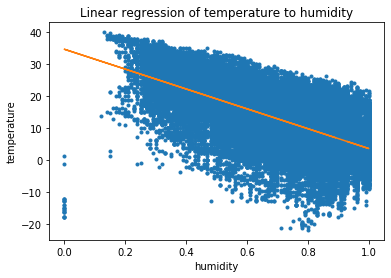

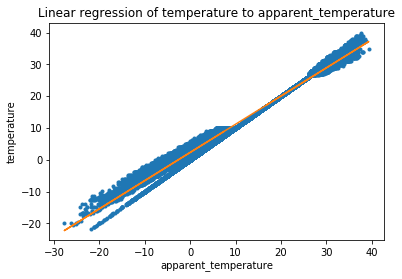

In [ ]:
x = training_dataset[['apparent_temperature', 'humidity']]
x1 = training_dataset[['humidity']]
x2 = training_dataset[['apparent_temperature']]
y = training_dataset[['temperature']]
lm = linear_model.LinearRegression()
model = lm.fit(x, y)
y_pred = lm.predict(x)

print("The Mean Absolute Error of the model is:", mean_absolute_error(y, y_pred))
#####################################
print("Individual linear regressions to prediction features shown below:")
model1 = lm1.fit(x1, y)
y_pred1 = lm1.predict(x1)
plt.plot(x1, y, '.', x1, y_pred1, '-')
plt.xlabel('humidity')
plt.ylabel('temperature')
plt.title('Linear regression of temperature to humidity')
plt.show()
#####################################
model2 = lm2.fit(x2, y)
y_pred2 = lm2.predict(x2)
plt.plot(x2, y, '.', x2, y_pred2, '-')
plt.xlabel('apparent_temperature')
plt.ylabel('temperature')
plt.title('Linear regression of temperature to apparent_temperature')
plt.show()

4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any.

Feature with maximum correlation: visibility    0.048895
Name: pressure, dtype: float64
The Mean Absolute Error of the model is: 7.230482720005235

Explanation:
The performance of features 'visibility' and 'pressure' as predictors of temperature is meaningfully worse than features
'apparent_temperature' and 'humidity'.
Pressure has a very low (almost no) correlation with temperature, as evidenced in Q1.
Visibility does have a positive correlation with temperature (refer to Q1), however the values are more broadly dispersed
which naturally increases the error displayed

Individual linear regressions to prediction features shown below:


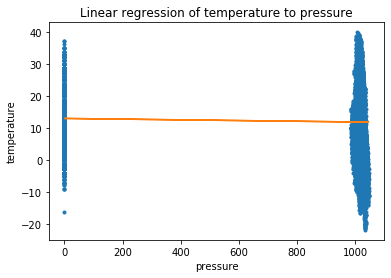

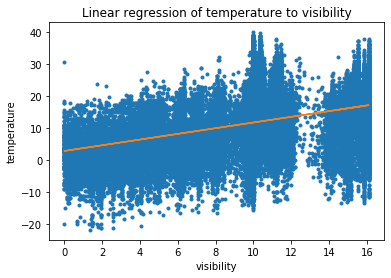

In [ ]:
pressure_corr = pd.DataFrame(training_dataset.corr()['pressure'][:]).drop(['pressure'])
print('\033[1m' + '\033[4m' + "Feature with maximum correlation:" + '\033[0m', abs(pressure_corr['pressure']).nlargest(1))
##########################
x3 = training_dataset[['pressure', 'visibility']]
x4 = training_dataset[['pressure']]
x5 = training_dataset[['visibility']]
y = training_dataset[['temperature']]
model3 = lm.fit(x3, y)
y_pred3 = lm.predict(x3)
#####################################print('\033[1m' + '\033[4m' + "Findings:" + '\033[0m')
print('\033[1m' + '\033[4m' + "The Mean Absolute Error of the model is:"  + '\033[0m', mean_absolute_error(y, y_pred3))
#####################################
print("")
print('\033[1m' + '\033[4m' + "Explanation:" + '\033[0m')
print("The performance of features 'visibility' and 'pressure' as predictors of temperature is meaningfully worse than features")
print("'apparent_temperature' and 'humidity'.")
print("Pressure has a very low (almost no) correlation with temperature, as evidenced in Q1.")
print("Visibility does have a positive correlation with temperature (refer to Q1), however the values are more broadly dispersed")
print("which naturally increases the error displayed")
print("")
print("Individual linear regressions to prediction features shown below:")
model4 = lm.fit(x4, y)
y_pred4 = lm.predict(x4)
plt.plot(x4, y, '.', x4, y_pred4, '-')
plt.xlabel('pressure')
plt.ylabel('temperature')
plt.title('Linear regression of temperature to pressure')
plt.show()
#####################################
model5 = lm.fit(x5, y)
y_pred5 = lm.predict(x5)
plt.plot(x5, y, '.', x5, y_pred5, '-')
plt.xlabel('visibility')
plt.ylabel('temperature')
plt.title('Linear regression of temperature to visibility')
plt.show()